In [8]:
# Importing necessary libraries and files for the project
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import numpy as np # Linear algebra
import matplotlib.pyplot as plt # This is used for the plot the graph
%matplotlib inline
from google.colab import files
uploaded = files.upload()
import io
wq = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
# Dataset is now stored in a Pandas Dataframe
#wq = pd.read_csv("winequality-red.csv") # WineQuality dataset
import seaborn as sns # Used for plot interactive graph
print(wq) # Print winequality-red.csv file stored as 'wq'
from sklearn.linear_model import LinearRegression # To apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # to check the error and accuracy of the model

Saving winequality-red.csv to winequality-red.csv
      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598           

In [9]:
# Display the first 5 rows
wq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Display the last 5 rows
wq.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
# Description of the dataset
wq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# Dimension
wq.shape

(1599, 12)

In [13]:
# Features
x = wq.iloc[:,0:11]
y = wq["quality"]

In [14]:
# Displaying X-Axis data
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
# Displaying Y-Axis data
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [16]:
# Displaying Correlation
wq.corr

<bound method DataFrame.corr of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0

In [17]:
# Displaying Data Types
wq.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [18]:
# Checking if any null values exist in the data
wq.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.30, random_state=5) #Splitting the data into train/test

In [20]:
x_train.shape #Viewing dimensions

(1119, 11)

In [21]:
y_test.shape

(480,)

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=5)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [23]:
pred = clf.predict(x_test)
pred

array([6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 7, 6, 7, 6, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 4, 7, 6, 6, 6, 5, 6, 6, 5, 5, 5,
       7, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 8, 6, 5, 6,
       7, 6, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 6, 5,
       6, 5, 5, 6, 6, 6, 6, 7, 6, 6, 6, 7, 6, 6, 5, 8, 6, 6, 6, 5, 6, 5,
       7, 6, 5, 5, 6, 4, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 5,
       5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 7, 5, 5, 5, 6, 5, 5, 5, 5, 6,
       5, 5, 5, 7, 5, 5, 6, 5, 6, 7, 7, 6, 6, 5, 6, 6, 7, 7, 6, 5, 7, 5,
       4, 5, 5, 6, 5, 6, 5, 5, 5, 7, 7, 6, 5, 5, 6, 5, 5, 8, 5, 6, 6, 6,
       5, 6, 6, 6, 7, 5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 5, 8, 5, 5, 6, 5, 6,
       7, 5, 7, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 7, 6, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 5, 4, 5, 5, 6, 7, 5, 6, 5, 7, 6, 5, 5, 6, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 7, 7, 7, 5, 6, 6, 5, 6, 7, 5, 6, 6,
       6, 4, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6,

In [24]:
print(clf.score(x_test,y_test, sample_weight=None)) #Viewing predicted values test

0.6083333333333333


In [25]:
print(clf.score(x_train,y_train, sample_weight=None)) #Viewing training values test

1.0


In [26]:
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix 
print('Accuracy:', accuracy_score(y_test, pred)) #Checking accuracy

Accuracy: 0.6083333333333333


In [27]:
clf.feature_importances_ #Viewing features importance

array([0.0562184 , 0.11201147, 0.07346714, 0.07779411, 0.11214256,
       0.04773649, 0.11279001, 0.05121493, 0.03771951, 0.12234874,
       0.19655665])

In [28]:
confusion_matrix(y_test, pred) #Checking false/true positives/negatives

array([[  0,   0,   3,   0,   0,   0],
       [  0,   1,   6,   3,   1,   0],
       [  0,  10, 153,  44,   6,   0],
       [  0,   3,  51, 104,  21,   2],
       [  0,   3,   3,  24,  33,   2],
       [  0,   0,   0,   3,   3,   1]])

In [29]:
features = wq.columns
importances = clf.feature_importances_
indices = np.argsort(importances) #Assigning feature variables for graph

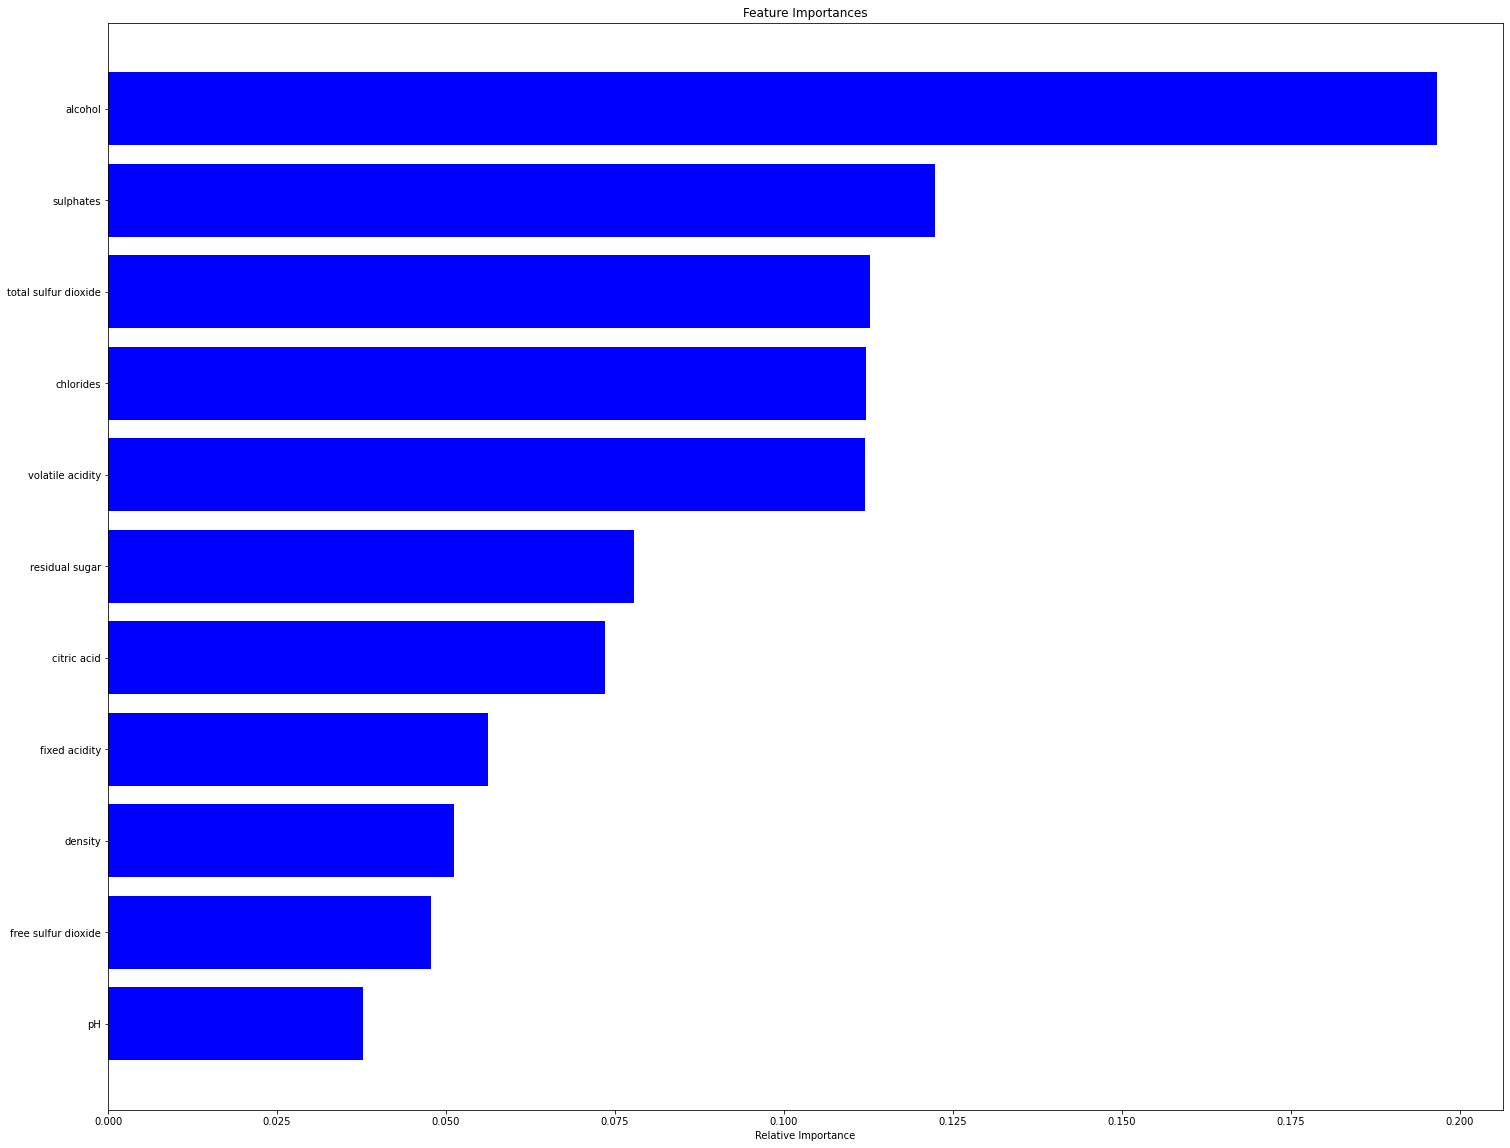

In [30]:
fig = plt.figure(figsize=(25,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_10 <= 9.85
|   |--- feature_6 <= 98.50
|   |   |--- feature_9 <= 0.57
|   |   |   |--- feature_10 <= 9.08
|   |   |   |   |--- feature_4 <= 0.07
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_4 >  0.07
|   |   |   |   |   |--- feature_9 <= 0.51
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- feature_9 >  0.51
|   |   |   |   |   |   |--- feature_1 <= 0.60
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_1 >  0.60
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |--- feature_10 >  9.08
|   |   |   |   |--- feature_6 <= 10.50
|   |   |   |   |   |--- feature_3 <= 1.65
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_3 >  1.65
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_6 >  10.50
|   |   |   |   |   |--- feature_6 <= 90.50
|   |   |   |   |   |   |--- feature_1 <= 0.75
|   |   |   |   |   |   |   |--- feature_1 <= 0.23
|   |   |   |   |   |   |   |   |--- feature_0 

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model=RandomForestClassifier(n_estimators=500,oob_score=True,max_features='auto')
model.fit(x_train,y_train) #Fitting and running Random Forest Model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
model.oob_score_ #Checking accuracy of the validation data

0.676496872207328

In [35]:
pred= model.predict(x_test)

In [36]:
confusion_matrix(y_test,pred) ##Checking false/true positives/negatives

array([[  0,   0,   2,   1,   0,   0],
       [  1,   0,   3,   7,   0,   0],
       [  0,   0, 175,  38,   0,   0],
       [  0,   0,  43, 128,  10,   0],
       [  0,   0,   5,  27,  32,   1],
       [  0,   0,   0,   4,   2,   1]])

In [37]:
print('Accuracy:', accuracy_score(y_test, pred)) #Checking accuracy of model

Accuracy: 0.7


In [38]:
from sklearn.model_selection import cross_val_score
model=RandomForestClassifier(n_estimators=500,oob_score=True,max_features='auto')
print(cross_val_score(model, x, y, cv=5, scoring ='accuracy').mean())

0.5697335423197492


In [39]:
from sklearn.model_selection import cross_val_score
model=RandomForestClassifier(n_estimators=500,oob_score=True,max_features='auto')
print(cross_val_score(model, x, y, cv=10, scoring ='accuracy').mean())

0.5747405660377358


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=5)
print(cross_val_score(clf, x, y, cv=5, scoring ='accuracy').mean())

0.48468064263322885


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=5)
print(cross_val_score(clf, x, y, cv=10, scoring ='accuracy').mean())

0.4796737421383647


In [42]:
##Ada booster
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
array = wq.values
array

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [44]:
X = array[:,0:11]
Y = array[:,11]

In [45]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [46]:
Y

array([5., 5., 5., ..., 6., 5., 6.])

In [47]:
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=100, random_state=7)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)

In [48]:
print(results.mean())

0.5059630503144654


In [49]:
model = AdaBoostClassifier(n_estimators=100, random_state=7)
model.fit(X, Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=7)

In [50]:
model.feature_importances_

array([0.  , 0.49, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.48])

In [51]:
wq.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [52]:
model.score(X,Y)

0.5716072545340838

In [53]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, Y)

In [54]:
clf.score(X, Y)

0.5678549093183239